### **EDA + LINEAR REGRESSION - Medical insurance**

## EDA

In [61]:
import pandas as pd

df = pd.read_csv("medical_insurance_cost.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [63]:
df.drop(["region"], axis = 1, inplace = True)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


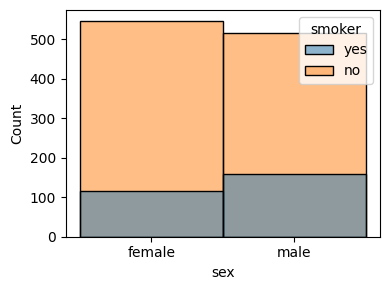

In [64]:
#CATEGORICAL ANALYSIS

import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 1, figsize=(4, 3))

sns.histplot(ax=axis, data=df, x="sex", hue="smoker")

plt.tight_layout()

plt.show()

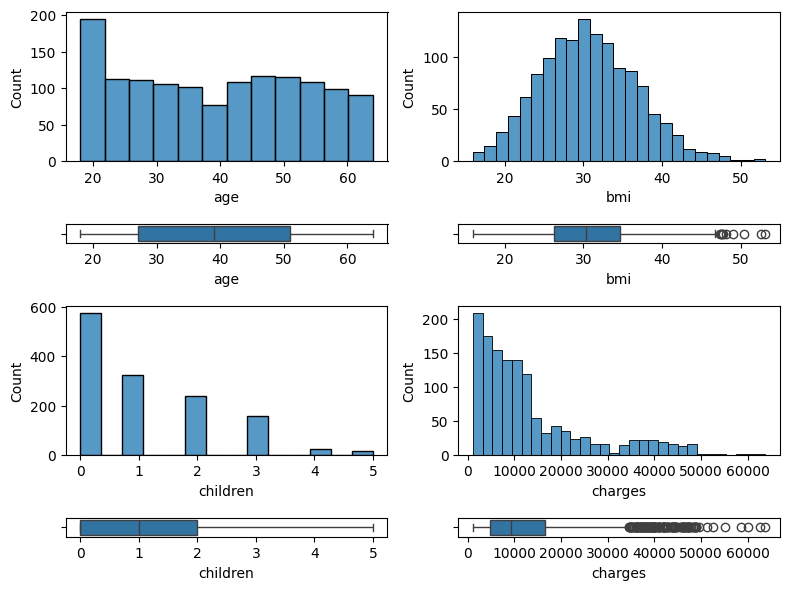

In [65]:
#NUMERICAL ANALYSIS

#Create the figure
fig, axis = plt.subplots(4, 2, figsize=(8, 6), gridspec_kw={"height_ratios": [8, 1, 8, 1]})


sns.histplot(ax=axis[0, 0], data=df, x="age")
sns.boxplot(ax=axis[1, 0], data=df, x="age")

sns.histplot(ax=axis[0, 1], data=df, x="bmi")
sns.boxplot(ax=axis[1, 1], data=df, x="bmi")

sns.histplot(ax=axis[2, 0], data=df, x="children")
sns.boxplot(ax=axis[3, 0], data=df, x="children")

sns.histplot(ax=axis[2, 1], data=df, x="charges")
sns.boxplot(ax=axis[3, 1], data=df, x="charges")

plt.tight_layout()
plt.show()



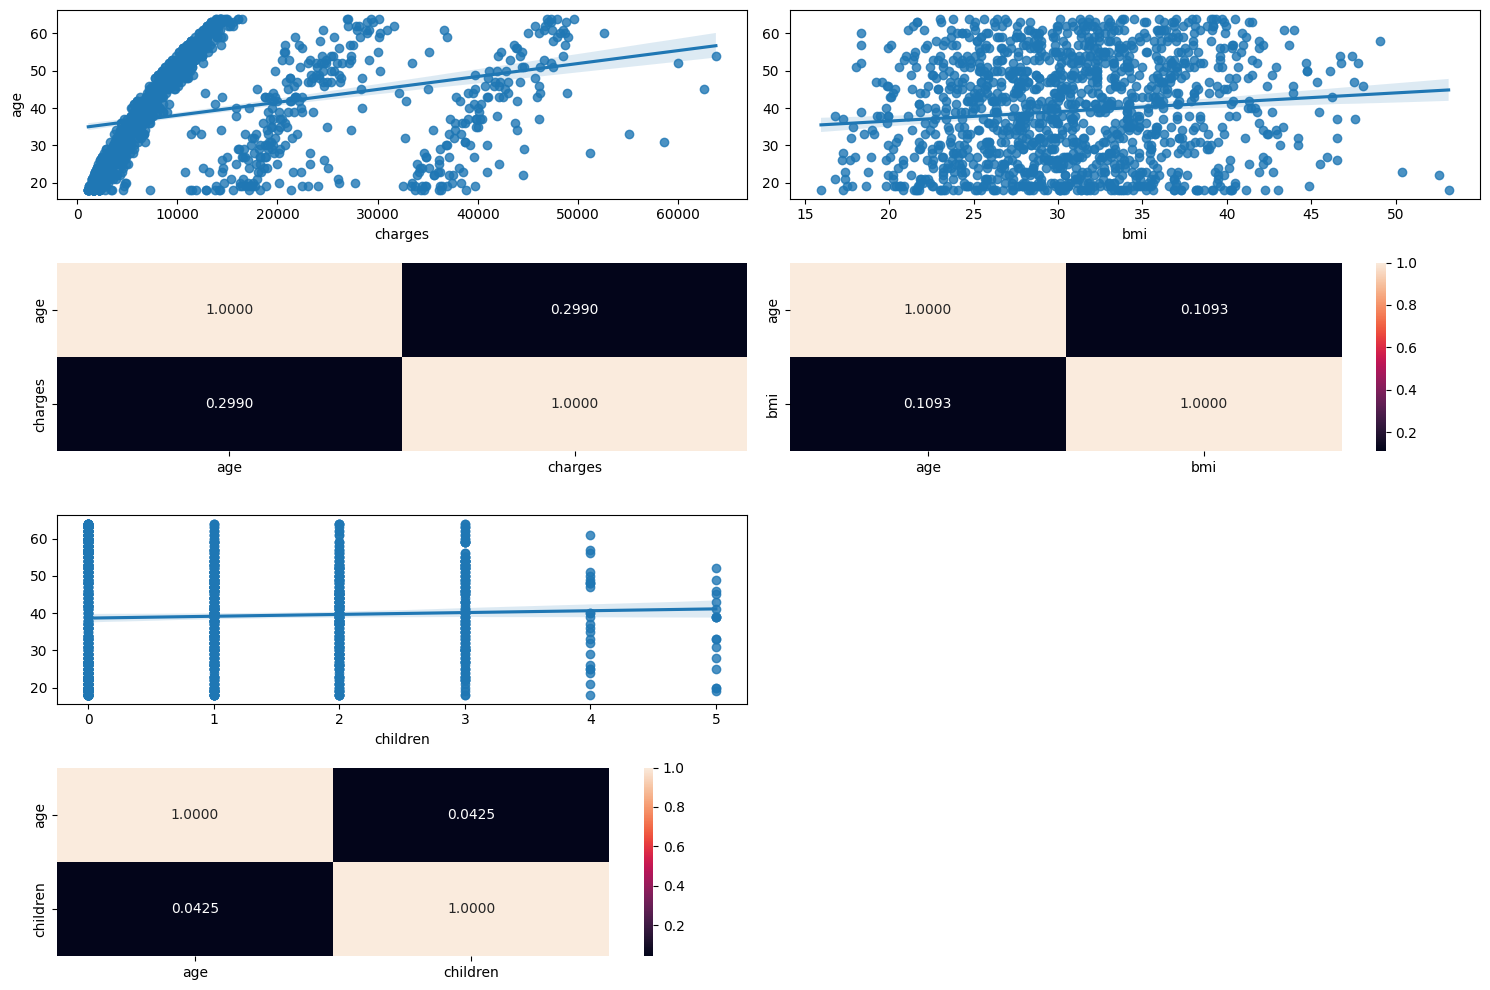

In [66]:
# Creating the figures
fig, axis = plt.subplots(4, 2, figsize = (15, 10))

# Set axis labels
sns.regplot(ax = axis[0, 0], data = df, x = "charges", y = "age")
sns.heatmap(df[["age", "charges"]].corr(), annot = True, fmt = ".4f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "age").set(ylabel = None)
sns.heatmap(df[["age", "bmi"]].corr(), annot = True, fmt = ".4f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "children", y = "age").set(ylabel = None)
sns.heatmap(df[["age", "children"]].corr(), annot = True, fmt = ".4f", ax = axis[3, 0]).set(ylabel = None)

fig.delaxes(axis[2,1])
fig.delaxes(axis[3,1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

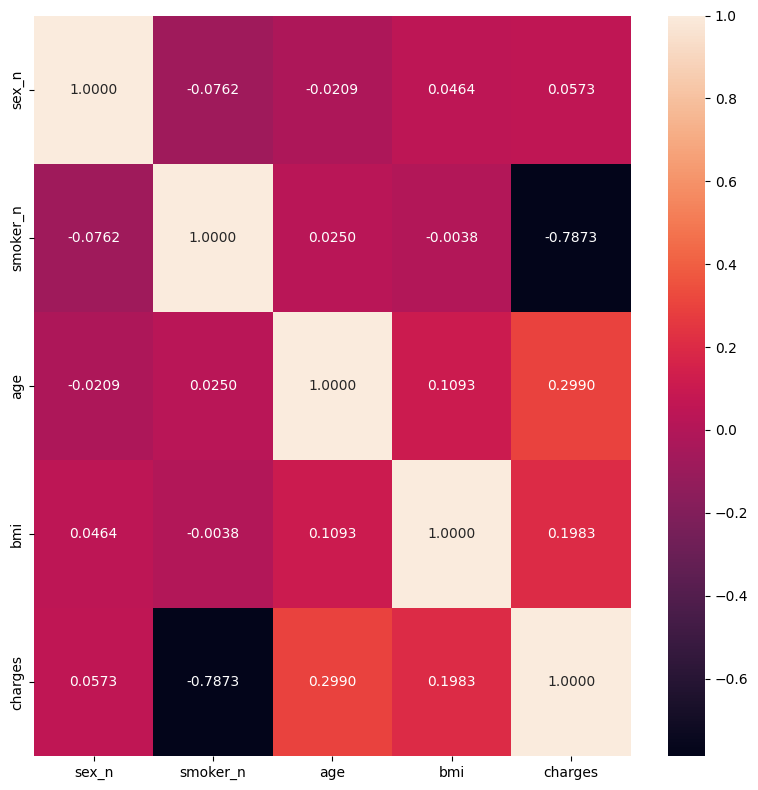

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]

ig, axes = plt.subplots(figsize=(8, 8))

# Create the heatmap using the navy colormap
sns.heatmap(df[["sex_n", "smoker_n", "age", "bmi","charges"]].corr(), annot=True, fmt=".4f")

plt.tight_layout()

# Show the plot
plt.show()

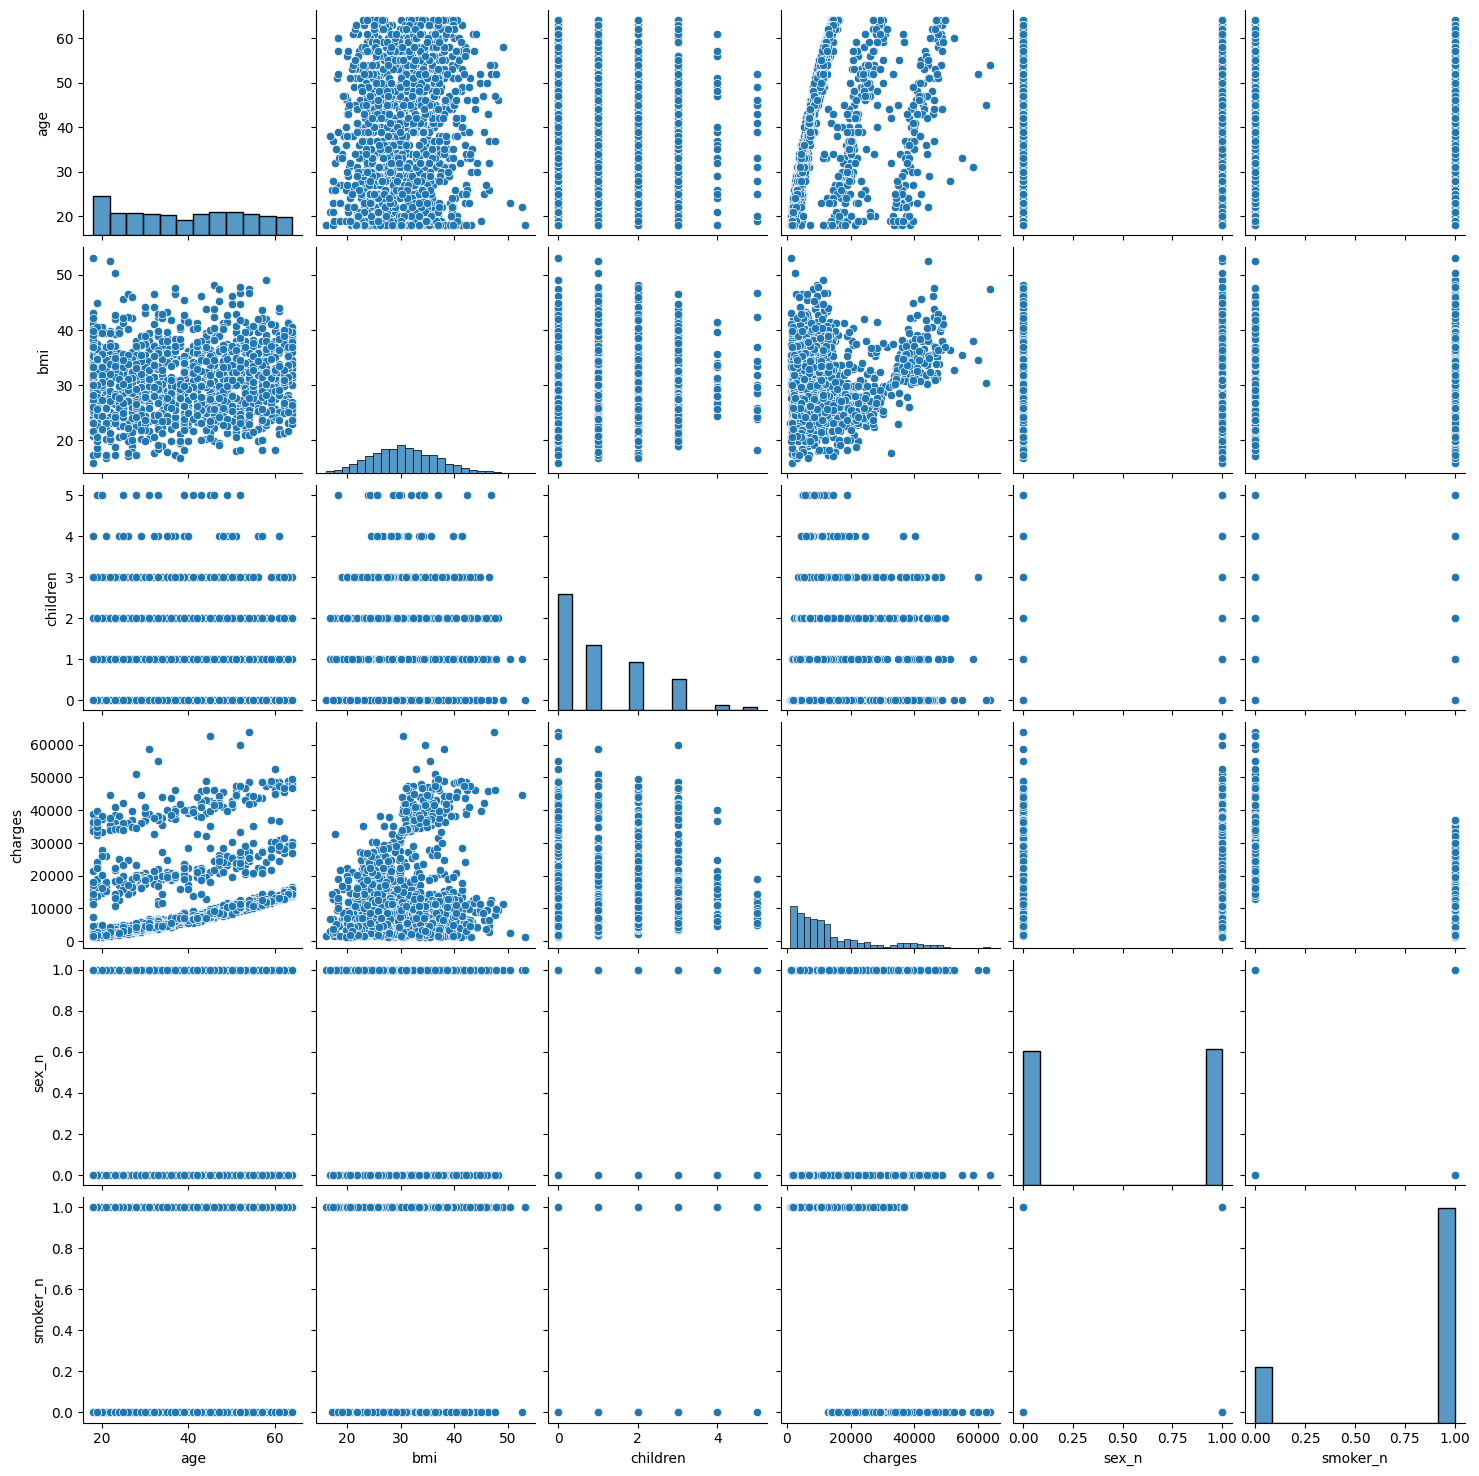

In [68]:
sns.pairplot(data=df)

In [69]:
df.describe()

,age,bmi,children,charges,sex_n,smoker_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


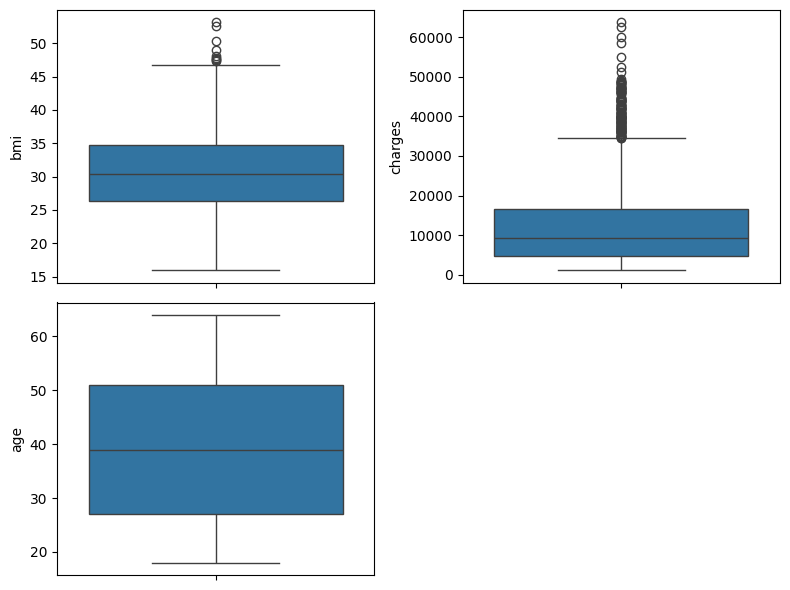

In [70]:
fig, axis = plt.subplots(2, 2, figsize = (8, 6))

sns.boxplot(ax = axis[0, 0], data = df, y = "bmi")
sns.boxplot(ax = axis[0, 1], data = df, y = "charges")
sns.boxplot(ax = axis[1, 0], data = df, y = "age")

fig.delaxes(axis[1,1])

plt.tight_layout()

plt.show()

In [71]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
sex_n       0
smoker_n    0
dtype: int64

In [72]:
# Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
total_data_scal.head()


,age,bmi,children,sex_n,smoker_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.043816


In [73]:
#Feature selection

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("charges", axis = 1)
y = total_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,children,smoker_n
0,0.608696,0.107345,0.4,1.0
1,0.630435,0.224913,0.0,1.0
2,0.739130,0.239440,0.0,1.0
3,0.456522,0.493947,1.0,1.0
4,0.782609,0.148238,0.6,1.0


In [74]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("clean_train.csv", index = False)
X_test_sel.to_csv("clean_test.csv", index = False)

## LINEAL REGRESSION

In [75]:
train_data = pd.read_csv("clean_train.csv")
test_data = pd.read_csv("clean_test.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.608696,0.107345,0.4,1.0,0.128845
1,0.630435,0.224913,0.0,1.0,0.118324
2,0.739130,0.239440,0.0,1.0,0.414952
3,0.456522,0.493947,1.0,1.0,0.119316
4,0.782609,0.148238,0.6,1.0,0.181225


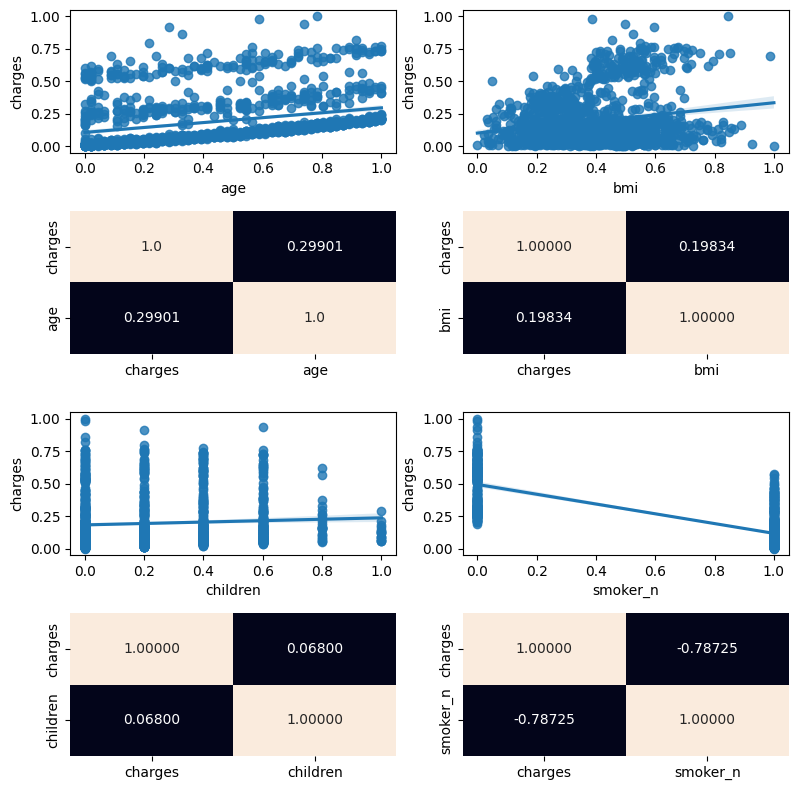

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (8, 8))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".5", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".5f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".5f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".5f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [77]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [78]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 0.32353188346512607
Coefficients (b1, b2): [ 0.18875573  0.19432238  0.03409496 -0.37755399]


In [80]:
y_pred = model.predict(X_test)
y_pred

array([ 1.18582710e-01,  9.33436083e-02,  5.69402809e-01,  1.32485010e-01,
        4.11073127e-01,  1.59291645e-01, -1.56496019e-02,  2.49460673e-01,
       -6.03509954e-03,  1.60191438e-01,  4.37353262e-01,  1.30478442e-01,
        6.91908902e-02,  5.96848879e-01,  6.26363350e-01,  5.76306011e-01,
        2.26511271e-01,  5.57410487e-01,  1.30897419e-01,  4.83231717e-01,
        5.03063599e-02,  1.49193364e-01,  2.55726734e-02,  8.70515674e-02,
        1.61314900e-01,  1.81110854e-01,  2.18382771e-01,  7.88567312e-02,
        1.34239289e-01,  2.01100247e-02,  1.33269003e-01,  1.88951125e-01,
        5.71483179e-02,  3.65349560e-02,  5.90241880e-02,  1.81429430e-01,
        1.96866918e-02,  1.28258945e-01,  5.12578214e-01,  5.04797300e-01,
        5.02573471e-02,  4.96683603e-02,  2.12447777e-01,  1.63882083e-01,
        1.24627509e-01,  1.81366064e-01,  6.43036607e-02,  3.87595509e-02,
        5.51184491e-01,  1.30222489e-01,  2.36966450e-01,  2.29035057e-02,
        1.76174612e-01, -

In [81]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.008658096232451857
R2 Score: 0.7811147722517887
